# 샤프 지수란
## 위험 단위당 수익률
## 샤프지수 = (예상 수익률 - 무위험률) / 수익률 표준편차

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('C:/Users/Administrator/Desktop/stock_study/')

from Investar import Analyzer



In [2]:
mk = Analyzer.MarketDB()

In [3]:
stocks = ["삼성전자","한화솔루션","한컴위드","현대자동차"]
# stocks = ["삼성전자","한컴위드"]

In [4]:
df = pd.DataFrame()
for s in stocks:
    df[s] = mk.get_daily_price(s, "2018-10-12")["close"]

end_date is initialized to '2021-01-06'
end_date is initialized to '2021-01-06'
end_date is initialized to '2021-01-06'
end_date is initialized to '2021-01-06'


In [5]:
df

,삼성전자,한화솔루션,한컴위드,현대자동차
date,,,,
2018-10-12,44000,16850,2765,115500
2018-10-15,43800,16500,2750,113500
2018-10-16,43600,16550,2815,116500
2018-10-17,44150,17200,2880,118500
2018-10-18,44050,16800,2880,116000
...,...,...,...,...
2020-12-29,78300,47500,6330,190500
2020-12-30,81000,47900,6350,192000
2021-01-04,83000,49200,6350,207500


In [6]:
daily_ret = df.pct_change()
annual_ret = daily_ret.mean()*252
daily_cov = daily_ret.cov()
annual_cov = daily_cov * 252

port_ret = []
port_risk = []
port_weights = []
sharpe_ratio = []

In [7]:
daily_ret

,삼성전자,한화솔루션,한컴위드,현대자동차
date,,,,
2018-10-12,NaN,NaN,NaN,NaN
2018-10-15,-0.004545,-0.020772,-0.005425,-0.017316
2018-10-16,-0.004566,0.003030,0.023636,0.026432
2018-10-17,0.012615,0.039275,0.023091,0.017167
2018-10-18,-0.002265,-0.023256,0.000000,-0.021097
...,...,...,...,...
2020-12-29,-0.005083,0.054384,0.004762,0.005277
2020-12-30,0.034483,0.008421,0.003160,0.007874
2021-01-04,0.024691,0.027140,0.000000,0.080729


In [8]:
annual_ret

삼성전자     0.325570
한화솔루션    0.674777
한컴위드     0.540857
현대자동차    0.333839
dtype: float64

In [9]:
daily_cov

,삼성전자,한화솔루션,한컴위드,현대자동차
삼성전자,0.000316,0.000243,0.000155,0.000195
한화솔루션,0.000243,0.001191,0.000386,0.000344
한컴위드,0.000155,0.000386,0.000967,0.000266
현대자동차,0.000195,0.000344,0.000266,0.000611


In [10]:
annual_cov

,삼성전자,한화솔루션,한컴위드,현대자동차
삼성전자,0.079715,0.061206,0.038968,0.049176
한화솔루션,0.061206,0.300091,0.097351,0.086569
한컴위드,0.038968,0.097351,0.243646,0.066964
현대자동차,0.049176,0.086569,0.066964,0.154037


In [11]:
for _ in range(20000):
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)
    
    returns = np.dot(weights, annual_ret)
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))
    
    port_ret.append(returns)
    port_risk.append(risk)
    port_weights.append(weights)
    sharpe_ratio.append(returns/risk)
    
portfolio = {'Returns': port_ret, 'Risk': port_risk, 'Sharpe':sharpe_ratio}
for i,s in enumerate(stocks):
    portfolio[s] = [weight[i] for weight in port_weights]
df = pd.DataFrame(portfolio)
df = df[['Returns','Risk','Sharpe'] + [s for s in stocks]]

In [12]:
max_sharpe = df.loc[df.Sharpe == df.Sharpe.max()]
min_risk = df.loc[df.Risk == df.Risk.min()]

In [13]:
df

,Returns,Risk,Sharpe,삼성전자,한화솔루션,한컴위드,현대자동차
0,0.607509,0.434911,1.396860,0.036866,0.659959,0.236551,0.066625
1,0.452999,0.336624,1.345714,0.270901,0.027399,0.541301,0.160399
2,0.455336,0.300036,1.517608,0.357127,0.188173,0.291256,0.163444
3,0.480969,0.316555,1.519386,0.300201,0.296211,0.234872,0.168716
4,0.464611,0.304942,1.523605,0.431719,0.181372,0.350236,0.036673
...,...,...,...,...,...,...,...
19995,0.432144,0.331214,1.304729,0.117738,0.049387,0.398232,0.434644
19996,0.493000,0.335572,1.469131,0.148002,0.268360,0.332776,0.250862
19997,0.498270,0.344044,1.448275,0.098404,0.313763,0.281478,0.306356
19998,0.469545,0.333627,1.407395,0.107471,0.179951,0.363459,0.349119


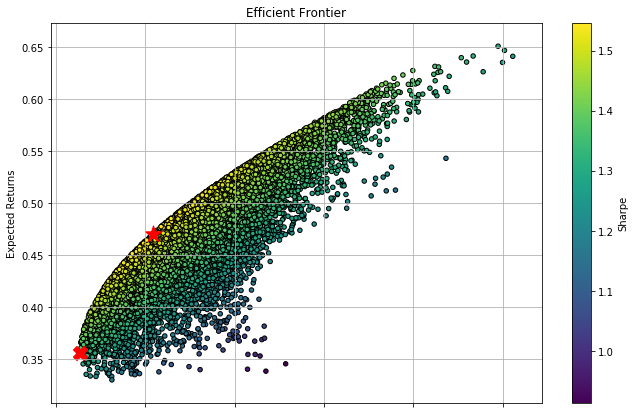

In [14]:
df.plot.scatter(x="Risk",y="Returns", c="Sharpe", cmap="viridis", edgecolors = "k", figsize=(11,7), grid =True)
plt.scatter(x=max_sharpe.Risk, y= max_sharpe.Returns, c="r", marker="*", s=300)
plt.scatter(x=min_risk.Risk, y= min_risk.Returns, c="r", marker="X", s=200)
plt.title("Efficient Frontier")
plt.xlabel("Risk")
plt.ylabel("Expected Returns")
plt.show()

In [15]:
max_sharpe

,Returns,Risk,Sharpe,삼성전자,한화솔루션,한컴위드,현대자동차
12673,0.470597,0.304244,1.546777,0.478334,0.259384,0.252537,0.009745


In [16]:
min_risk

,Returns,Risk,Sharpe,삼성전자,한화솔루션,한컴위드,현대자동차
18538,0.355838,0.263532,1.350264,0.689043,0.010336,0.116766,0.183855
